In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import celestializer as cl

In [3]:
img_sky = cl.RawImage(cl.Paths.observations / "2024-11-05/IMG_3320.CR2").load()
img = img_sky.raw().green_interpolated()
img_sky.metadata.model_dump()

{'width': 5202,
 'height': 3465,
 'focal_length': 18.0,
 'aperture': 3.5,
 'shutter': 10.0,
 'iso': 6400,
 'timestamp': datetime.datetime(2024, 11, 5, 0, 37, 58),
 'camera': 'Canon EOS 1200D',
 'bit_depth': 14}

In [4]:
img_in = img.green_interpolated()
img_in = cl.correct_vignette(img_in)
img_in = img_in.channel("green")

mask_hot, mask_dead = cl.find_defects(img_in)
print(f"Found {mask_hot.sum()} hot pixels and {mask_dead.sum()} dead pixels")
mask = mask_hot | mask_dead
img_in = cl.replace_defects(img_in, mask)
img_in = img_in.green_interpolated()
img_in -= img_in.min()
img_in /= img_in.max()

Found 42 hot pixels and 107 dead pixels


In [5]:
mask = cl.classify_star_pixels(img_in.to_bitdepth(8))
stars = cl.stars_from_mask(mask)
print(f"Found {len(stars)} stars")

100%|██████████| 914/914 [00:06<00:00, 134.83it/s]


Found 914 stars


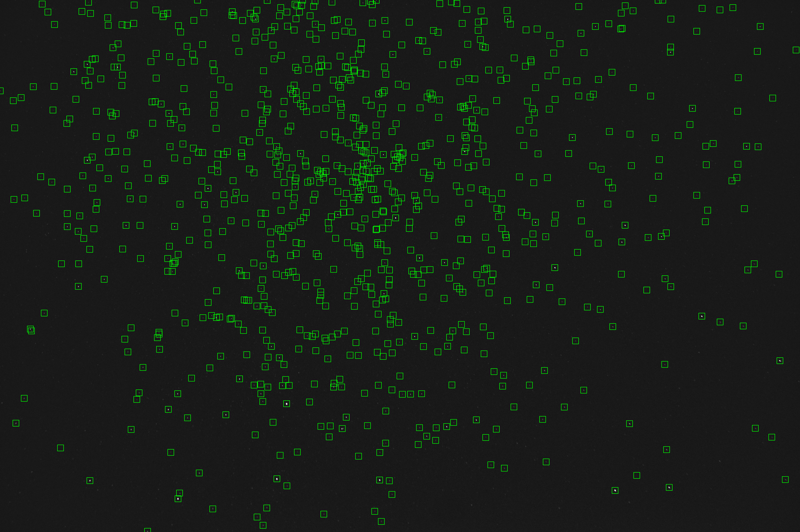

In [6]:
img_stars = cl.show_stars(img_in, stars)
img_stars.save(cl.Paths.saved / "floodFill_result.png")
img_stars.preview().show()